# 4330 Final Regression Project

In [1]:
#imports matplotlib for plotting
import matplotlib.pyplot as plt
#imports numpy for mathematical computations
import numpy as np
#imports pandas for data manipulation
import pandas as pd
#imports several sklearn functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

## Data Preparation

In [2]:
#loads the target data to a dataframe titled y using the pandas library
target = open('/Users/noamgal/Downloads/target-final.csv')
y = pd.read_csv(target, sep=',',header=None)

#loads the feature data to a dataframe titled x
features = ('/Users/noamgal/Downloads/features-final.csv')
x = pd.read_csv(features, sep=',',header=None)

x = x.iloc[1:,1:]
y = y.iloc[1:,1:]

x.head(),y.head()

(        1     2     3    4      5      6     7       8    9      10  ...  \
 1  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  ...   
 2  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  ...   
 3  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  ...   
 4  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  ...   
 5  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  ...   
 
           41         42         43         44         45         46  \
 1  10.320404  53.319480  51.733969  18.873686  24.454063  -7.194644   
 2  19.435654   4.955477 -25.754959  26.569556  -7.682459  16.298635   
 3 -18.693977 -16.762125  39.234918 -14.328085  63.590530   4.659525   
 4  24.900168 -12.326538 -22.281440  25.984793  19.166837  30.875786   
 5  32.039863  -5.085242  -2.238744   3.611687  15.436979   6.150152   
 
           47         48         49         50  
 1 -34.519912   6.302196  18.908724  45.757267  
 2  

The dataset is composed of 506 datapoints, each of which has 50 features. The goal of this exercise is to determine which of these features are useful in predicting the y-values.

In [3]:
#scales x to standardize the dataset using the StandardScaler function from sklearn
scaler = StandardScaler()
x = pd.DataFrame(StandardScaler().fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,...,-0.161944,1.522710,1.422403,0.193065,0.398646,-0.914790,-1.953610,-0.304668,0.160452,1.301910
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,...,0.218459,-0.346709,-1.625757,0.503511,-0.910040,0.034429,0.700935,0.159058,1.132497,-1.348758
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,...,-1.372788,-1.186162,0.930731,-1.146269,1.992388,-0.435836,-0.745456,1.903476,1.469792,1.987146
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,...,0.446508,-1.014712,-1.489120,0.479922,0.183336,0.623402,2.321209,0.952034,-0.896749,1.180109
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,...,0.744465,-0.734814,-0.700706,-0.422592,0.031446,-0.375609,-1.360137,-0.592208,-2.192657,0.651308


## Question 1

Build a prediction model using 3 different methods: multivariate linear regression, ridge
regression and lasso regression.

### Linear Regression

In [4]:
# creates an object of the linear regression class using sklearn
lin_reg = LinearRegression()
# fits the linear regression model
lin_reg.fit(x, y)
# prints the regression coefficients and the intercept
lin_reg.coef_, lin_reg.intercept_

(array([[-0.82869019,  1.33129216,  0.12637585,  0.78116221, -1.79902882,
          2.59663455,  0.20407044, -3.09616364,  2.61857786, -2.29507505,
         -2.00967339,  0.95630778, -3.7562279 , -0.41223939,  0.00948397,
          0.17248542,  0.25581379, -0.49301751, -0.10606313, -0.10188887,
          0.28570166,  0.03804819,  0.00611643,  0.16373425,  0.23879694,
          0.02145962,  0.23345497, -0.37076463, -0.38765408, -0.10182363,
          0.19191972,  0.02346611, -0.24316386, -0.09847651, -0.30147486,
         -0.41847732, -0.21610279,  0.13852913, -0.00641479, -0.13677408,
         -0.12720625,  0.01118329, -0.04029917, -0.18373339,  0.07502851,
          0.36693337,  0.18107143,  0.12080855,  0.06187349,  0.21426202]]),
 array([22.53280632]))

In [5]:
# defines a function that displays the RMSE scores for use in assessing k-fold cross validation outputs using sklearn
def display_scores(scores):
    print("RMSE Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [6]:
# k-fold score using cross validation function from sklearn and MSE, which is the scoring method I chose
lin_scores = cross_val_score(lin_reg, x, y, scoring="neg_mean_squared_error", cv=10)
# calculates the root mean square error, my preferred performance measure, using numpy
lin_rmse_scores = np.sqrt(-lin_scores)
# returns the scores using a function previously defined
display_scores(lin_rmse_scores)

RMSE Scores: [ 3.19019125  3.83251931  4.14696991  5.87300859  5.93931747  4.6215257
  3.59427452 12.98231     5.96909194  3.84201287]
Mean: 5.399122156873591
Standard deviation: 2.71171917528369


### Ridge Regression

In [7]:
# creates an object of the ridge regression class using sklearnm but without optimizing the penalization parameter
ridge_reg = Ridge()
# fits the ridge regression model
ridge_reg.fit(x, y)
# returns the coefficients and intercept
ridge_reg.coef_, ridge_reg.intercept_

(array([[-0.82009004,  1.31234688,  0.10010755,  0.7847841 , -1.77161635,
          2.60626569,  0.19627503, -3.0667458 ,  2.53941197, -2.21894912,
         -2.00111382,  0.95432549, -3.74238447, -0.41278979,  0.00702869,
          0.17085017,  0.25845337, -0.49291085, -0.10443001, -0.10539045,
          0.28230674,  0.04008947,  0.00735412,  0.16642288,  0.23724765,
          0.02216312,  0.23235013, -0.36877664, -0.38850894, -0.10364155,
          0.19150011,  0.02311521, -0.24143964, -0.09546959, -0.29943496,
         -0.4157231 , -0.21474515,  0.136423  , -0.006153  , -0.13702417,
         -0.12654313,  0.01274464, -0.04331457, -0.18449222,  0.07552367,
          0.36637214,  0.17898855,  0.12070971,  0.06402303,  0.21318019]]),
 array([22.53280632]))

In [8]:
# same k-fold scoring mechanics as above
ridge_scores = cross_val_score(ridge_reg, x, y, scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)
display_scores(ridge_rmse_scores)

RMSE Scores: [ 3.17763622  3.81108955  4.11751432  5.88310562  5.92222977  4.6183645
  3.55656075 12.9499927   5.95781588  3.81966659]
Mean: 5.381397589052606
Standard deviation: 2.7098189145858886


The above ridge regression results are using the default penalization parameter for the purpose of comparing against the results of the optimized lasso regression model created in question 2

### Lasso Regression

In [9]:
# creates an object of the lasso regression class using sklearn, but without optimizing the penalization parameter
lasso_reg = Lasso()
# fits the lasso regression model
lasso_reg.fit(x, y)
# returns the coefficients and intercept
lasso_reg.intercept_, lasso_reg.coef_

(array([22.53280632]),
 array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
         2.7133553 , -0.        , -0.        , -0.        , -0.        ,
        -1.3435488 ,  0.18095664, -3.54338107, -0.        , -0.        ,
        -0.        ,  0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.        , -0.        , -0.        ,
         0.        , -0.        , -0.        ,  0.        , -0.        ,
        -0.        , -0.        , -0.        ,  0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.        ,  0.        ]))

In [10]:
# same k-fold scoring mechanics as above
lasso_scores = cross_val_score(lasso_reg, x, y, scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-lasso_scores)
display_scores(lasso_rmse_scores)

RMSE Scores: [ 2.92720425  3.06478176  2.74361422  7.62775722  5.7174416   6.64751086
  3.73594539 12.13411687  6.86367766  3.13048001]
Mean: 5.459252983539505
Standard deviation: 2.8393604053470485


The above lasso regression results are using the default penalization parameter for the purpose of comparing against the results of the optimized lasso regression model created in question 2.

## Question 2

For ridge and lasso, use cross validation to estimate the value of the penalization
parameter λ. Make sure to describe your choice of cross validation and the performance
measure you are using to test your model.

In [11]:
#createes an array of alphas/lambdas
alphas = 10**np.linspace(10,-2,100)*0.5

In [12]:
# optimizes the ridge penalization parameter using sklearn's built in cross validation function
ridgecv = RidgeCV(alphas = alphas, normalize = True)
ridgecv.fit(x, y)
# prints the optimal penalization parameter for Ridge
print('The optimal penalization parameter for Ridge is:', ridgecv.alpha_)

The optimal penalization parameter for Ridge is: 0.026683496156031508


In [13]:
#optimizes lasso lambda using sklearn's built in cross validation function
lassocv = LassoCV(alphas = alphas, normalize = True)
lassocv.fit(x, y.values.ravel())
# prints the optimal penalization parameter for Lasso
print('The optimal penalization parameter for Lasso is:', lassocv.alpha_)

The optimal penalization parameter for Lasso is: 0.008737642000038414


I used sklearn's built in cross validation functions, LassoCV and RidgeCV, to optimize an array of penalization parametrs, called alphas, that I generated using numpy. By default, these cross-validation methods use a leave-one-out cross-validator, which is equivalent to performing n splits on the dataset.

In [14]:
# Models ridge regression with the optimal penalization parameter
ridge_opt = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge_opt.fit(x, y)
ridge_opt.coef_, ridge_opt.intercept_

(array([[-7.42009248e-01,  1.12839657e+00, -1.19235902e-01,
          8.13578477e-01, -1.49469627e+00,  2.68973918e+00,
          1.20464145e-01, -2.74290147e+00,  1.84965944e+00,
         -1.58197931e+00, -1.91603702e+00,  9.32937066e-01,
         -3.58808063e+00, -4.16817401e-01, -1.51720196e-02,
          1.55806991e-01,  2.80173131e-01, -4.87337074e-01,
         -8.97536990e-02, -1.35879497e-01,  2.51224822e-01,
          5.57206286e-02,  1.76953485e-02,  1.95888848e-01,
          2.20953824e-01,  3.26816256e-02,  2.20584006e-01,
         -3.49248350e-01, -3.94001076e-01, -1.21288492e-01,
          1.87533409e-01,  2.23485820e-02, -2.26473388e-01,
         -6.39608097e-02, -2.82103191e-01, -3.84944278e-01,
         -1.99850362e-01,  1.16639487e-01, -4.61429274e-04,
         -1.37727557e-01, -1.20670778e-01,  2.60192953e-02,
         -6.72480288e-02, -1.93420161e-01,  7.80414349e-02,
          3.58096069e-01,  1.54917491e-01,  1.21492306e-01,
          8.06310741e-02,  2.02294650e-0

In [15]:
# same k-fold scoring mechanics as above
ridge_scores = cross_val_score(ridge_opt, x, y, scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)
display_scores(ridge_rmse_scores)

RMSE Scores: [ 3.06484172  3.64184164  3.84423788  5.99075953  5.77548652  4.6311156
  3.31127459 12.67324808  5.86035082  3.68250954]
Mean: 5.247566591328034
Standard deviation: 2.687710909286184


In [16]:
lasso_opt = Lasso(alpha = lassocv.alpha_, normalize = True)
lasso_opt.fit(x, y)
lasso_opt.coef_, lasso_opt.intercept_

(array([-0.32744015,  0.42601157, -0.03538094,  0.65799094, -1.00234952,
         2.9575113 , -0.        , -1.7236225 ,  0.        , -0.        ,
        -1.76304255,  0.68017998, -3.72434509, -0.22786708, -0.        ,
         0.        ,  0.10738519, -0.30843181, -0.        , -0.09880627,
         0.        ,  0.        ,  0.        ,  0.14681271,  0.06249991,
         0.        ,  0.        , -0.14283784, -0.17200835, -0.        ,
         0.        , -0.        , -0.        , -0.        , -0.03050274,
        -0.11491392, -0.        ,  0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        ,  0.        ,
         0.02978528,  0.        ,  0.        ,  0.        ,  0.        ]),
 array([22.53280632]))

In [17]:
lasso_scores = cross_val_score(lasso_opt, x, y, scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-lasso_scores)
display_scores(lasso_rmse_scores)

RMSE Scores: [ 2.96377502  3.35939383  3.19540597  6.33106048  5.31582548  4.978004
  3.19100759 12.72441367  6.02225724  3.28402882]
Mean: 5.136517210356575
Standard deviation: 2.805504045502061


Upon testing the models, I found that the mean Root Mean Squared Error (RMSE) across a k-fold cross validation, where k = 10, improved for both Lasso and Ridge from the previous models in question 1, which used the default penalization parameters. The RMSE was 2.688 for the optimized ridge against 2.71 for the unoptimized Ridge, and 2.839 for the unoptimized Lasso against 2.80 for the optimized Lasso.

I chose to use RMSE because I am more interested in the absolute distance of the errors than the predictive accuracy of the model. RMSE is a good performance measure when we are more interested in the size of our model's errors than the explanatory power of our predictions. 

## Question 3

Based on the previous answers, select what you think is the number r of relevant features. Justify your answer.

In [18]:
#counts and prints the number of relevant features
r = 0
for n in lasso_opt.coef_:
    if n != 0:
        r += 1
print(r)

21


The Lasso coefficients show that there are r = 21 relevant features in the dataset since the other 29 features have coefficients that are set to 0, which means the Lasso regression determined them to be irrelevant.

## Question 4

 Use PCA with r principal components in order to obtain a new data set {x˜i}.

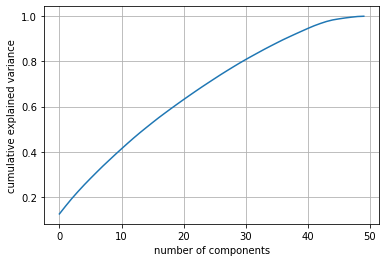

In [19]:
#fits the pca model on the relevant features set
pca = PCA().fit(x)
# plots a graph of explained variance per PCA componenent to help decide how many components to include
plt.plot(np.cumsum(pca.explained_variance_ratio_),)
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [20]:
pca.explained_variance_ratio_

array([0.12448178, 0.03483532, 0.0333481 , 0.03110563, 0.02967154,
       0.02828046, 0.02754817, 0.02709767, 0.02579288, 0.02571716,
       0.02506175, 0.02477398, 0.02410837, 0.02322256, 0.02229022,
       0.02199844, 0.02158382, 0.0204984 , 0.02026043, 0.01985903,
       0.01956348, 0.01925534, 0.01898881, 0.01862242, 0.01814234,
       0.01796383, 0.01786332, 0.01715885, 0.01686712, 0.01655721,
       0.01589685, 0.01530725, 0.01506171, 0.01498362, 0.0143258 ,
       0.01402704, 0.01380254, 0.01287673, 0.01267527, 0.01234433,
       0.01226163, 0.01162937, 0.01010325, 0.00902374, 0.00688012,
       0.00465732, 0.00407151, 0.00345536, 0.00294149, 0.0011566 ])

In [21]:
# creates a dataframe for the explained variance added by each additional principal components
exp_var = pd.DataFrame(pca.explained_variance_ratio_)
# creates a data frame that only includes the r principal components being used for graphing purposes
rel_exp_var = exp_var[0:21]
# creates a cumualative explained variance dataframe for the relevant principal components
cum_exp_var =pd.DataFrame(rel_exp_var[0].cumsum())

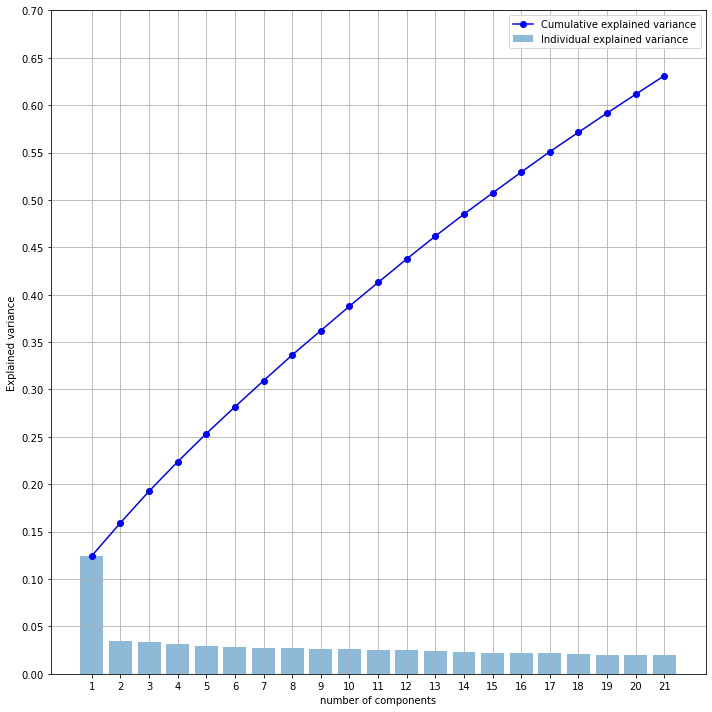

In [22]:
fig = plt.figure(figsize = (10, 10))
# creating the bar plot
plt.bar(np.arange(1,(len(rel_exp_var)+1),1), rel_exp_var[0],alpha=0.5, align='center', label='Individual explained variance')
plt.plot(np.arange(1,(len(rel_exp_var)+1),1), rel_exp_var[0].cumsum(),'bo-', label='Cumulative explained variance')
plt.grid()
plt.ylabel('Explained variance')
plt.xlabel('number of components')
plt.xticks(np.arange(1,22,1))
plt.yticks(np.arange(0,0.75,0.05))
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [23]:
exp_var = round(float(cum_exp_var.iloc[20])*100,2)
exp_var

63.11

In [24]:
print(f"The explained variance by x_i with 21 principal components is: {exp_var}%")

The explained variance by x_i with 21 principal components is: 63.11%


1 principle comonent preserves most of the explained variance, and each additional component adds less and less to the model. I decided to use a small number of components, so that I can visualize the data easily. However, to fully decide on the number of components to include, I tested the model out with 1,2, and 3 components with linear regression.

In [25]:
# creates a reduced dataframe with 95% of the variance
pca_model = PCA(n_components = r)
x_i = pd.DataFrame(pca_model.fit_transform(x))

In [26]:
x_i

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.881559,-0.447786,-1.107335,0.231274,-1.118296,-0.039224,1.001484,-1.350403,0.979878,-1.186128,...,-0.573806,-0.951706,-0.373457,2.331305,-1.339146,-2.065384,-0.491869,-2.761872,-0.978259,-0.029316
1,-1.571810,-0.092954,0.388030,-1.177278,0.514028,0.698839,-0.088088,2.500103,0.343187,1.637599,...,-0.740327,-0.347071,2.068242,-0.519996,1.093244,0.056943,-0.667253,0.960144,-0.017947,-0.562987
2,-1.960959,2.011972,0.145667,-0.163902,-3.325265,-0.787393,-1.253503,-0.998693,-1.666265,0.278603,...,0.524899,0.453288,1.104602,1.055211,-1.223380,0.878957,0.678399,0.032861,0.546543,-0.799705
3,-2.624065,0.301242,1.477641,-0.582194,1.287379,-0.149568,-2.413464,-0.310096,-0.271231,0.519627,...,0.374889,-0.148013,-0.019683,0.697118,-0.993311,-0.277929,-0.256473,-0.302379,-0.891267,0.077058
4,-2.572474,0.025215,-2.212344,0.580326,0.550175,0.429796,-0.720523,1.562803,-0.556146,-2.094554,...,-0.523437,0.106552,1.330117,0.863355,-0.825169,0.696110,-0.378560,-1.274826,0.515641,-0.782989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.467885,0.650350,-0.371580,-1.701187,0.058963,0.090683,-2.694742,0.638587,-1.687860,0.526827,...,0.869890,0.069259,-0.191255,1.148205,0.923018,-1.562939,-2.145665,0.348707,-0.051328,-0.346774
502,-0.335833,-0.626153,-0.080909,-0.785772,-0.654416,-0.964638,-1.098808,-1.477066,1.074028,-0.502127,...,-1.090676,-0.258759,-0.125148,-0.068048,0.038950,-0.238822,0.452954,-0.179092,2.599103,-0.856513
503,-0.251528,-0.499172,-1.990207,-3.123354,-0.979984,-0.374867,0.200550,-1.300996,-1.910910,0.198077,...,-0.294319,3.256640,-0.633140,-1.232438,0.232142,-1.909337,-0.565762,1.015906,-1.809034,-1.656109
504,-0.300342,1.467298,-0.227028,-1.730790,0.848487,-1.017840,-1.415855,0.997341,-0.653617,-1.036183,...,-1.101600,-1.728906,-2.130659,0.242225,0.516212,-1.131315,0.515560,-0.331797,-0.710123,-0.372731


## Question 5

Perform simple linear regression on the “reduced” data set {x˜i}. What do you observe? Do you get a better prediction model than using ridge regression or lasso regression? If it is better how do you explain this result? If it is worse why is this the case?

In [27]:
#fits the linear regression model
lin_reg.fit(x_i, y)
#prints the regression coefficients and the intercept
lin_reg.coef_, lin_reg.intercept_

(array([[-2.23727339,  2.35545626,  0.38424775,  0.22400159, -0.66929522,
         -1.44226399,  0.52267476,  0.64081562, -0.09932314, -0.94654927,
          0.16909715, -0.46320914,  1.57303011,  0.56879401, -0.83140267,
         -0.43747956, -1.0292814 , -0.98084566, -0.53022288, -0.37913952,
         -0.60305599]]),
 array([22.53280632]))

In [28]:
#k-fold score
lin_scores = cross_val_score(lin_reg, x_i, y, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

RMSE Scores: [ 3.64149069  4.49850711  3.67463685  7.19203744  5.5841534   4.9640147
  3.77327871 11.39279739  6.41304355  3.92766065]
Mean: 5.506162049979984
Standard deviation: 2.2794406230801423


The mean RMSE is significantly worse than that the ridge and lasso models. This is because of the decreased explaned variance.

## Question 6

Code ridge regression from scratch without using scikit learn. Use the value of λ you found
in Question 2. Check your result plotting the value of the coefficient outputted by your code
vs the value outputted by the scikit built in function.

In [29]:
# defines a function to calculate the beta coefficients
def normal(X,y, alpha = 1):
    # results in array( [ [1],..,[1] ] )
    m_ones = np.ones((len(X),1)) 
    # adds the additional ones as a new column to our X
    m = np.c_[m_ones,X]   
    # identity matrix with dimensions (n+1)
    I = np.identity(m.shape[1]) 
    # adjusting the first value in I to be 0, to account for the intercept term
    I[0][0] = 0   
    # implements the penalization parameter
    penalized = alpha*I
    # sets the betas to the optimal values found by the normal equation
    betas = np.linalg.inv(m.T.dot(m) + penalized).dot(m.T).dot(y)  
    return betas

# defines a funciton that multiplies the features by the beta values to create predictions
def predict(betas, X):
        X_predictor = np.c_[np.ones((X.shape[0], 1)), X]
        predictions = X_predictor.dot(betas)
        return predictions

I used numpy to rebuild the ridge regression model from scratch via functions that calculate the beta coefficients through the normal equations and then predict the y output by multiplying the betas by the features.

In [30]:
# calculates the beta coefficients using the optimal ridge penalization parameter
betas_opt = normal(x,y, alpha = ridgecv.alpha_)
beta_frame = pd.DataFrame(betas_opt).iloc[1:51]

In [31]:
# predicts the y_values
scratch_predctions = predict(betas_opt, x) 

<AxesSubplot:title={'center':'From Scratch Betas'}>

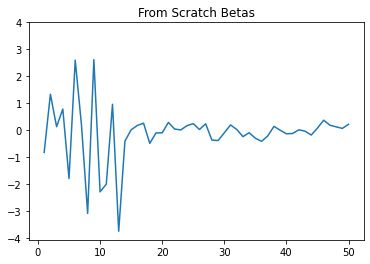

In [32]:
beta_frame.plot(title = 'From Scratch Betas', legend = None, yticks = range(-4,5,1))

<AxesSubplot:title={'center':'sklearn Coefficients'}>

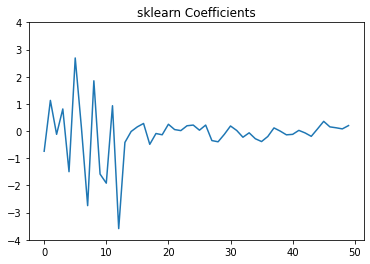

In [33]:
sklearn_coef_frame = pd.DataFrame(ridge_opt.coef_).T
sklearn_coef_frame.plot(title = 'sklearn Coefficients', legend = None, yticks = range(-4,5,1))

In the above figures, one can see that my from-scratch ridge regression results are virtually identical to that of sklearn.